#### <p style="width: 800px; border-radius: 12px; border: 3px dashed grey; padding: 20px; background-color: white; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #2E5B88; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 📈 Simple Linear Regression using TWO methods 🛠 </p>

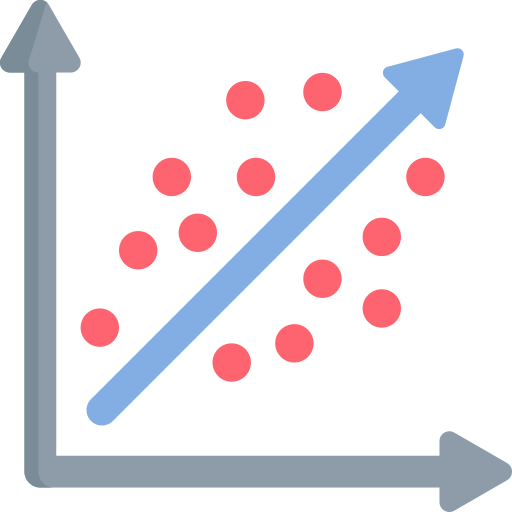

#### <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: pink; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: black; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 👒 Author</p>

* Madiha | Certified secondary school teacher in history and geography, I work in a secondary school.
* In parallel, I am currently studying at university: Accounting and Finance.
* Interested in data science: Regression Analysis.

### <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #ffcc99; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: black; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">  🎯 Objectives</p>

* Solve typical old problem statement for simple linear regression analysis.
* Explore the dataset & Create some charts for regression analysis.
* Solve Single variable linear regression using TWO methods.

-------------------------

# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #2E5B88; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color:white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 🔎 Step 1 - Explore Data</p>


In [1]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
import warnings
warnings.filterwarnings("ignore")

# Style
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# File
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pearsons-height-data-simple-linear-regression/Pearson.csv


Import Liberaries: `numpy` | `pandas` | `plotly` | `matplotlib` | `seaborn` |

In [2]:
# Reading the Dataset
pearson_df = pd.read_csv("/kaggle/input/pearsons-height-data-simple-linear-regression/Pearson.csv")

Pearson's height Dataset | `Fathers and Sons Height` 

In [3]:
# Open Dataset
pearson_df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


The dataset contains `1078` rows and `2` columns.

In [4]:
# View some basic information about the data frame
pearson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


In [5]:
# View some statistical information
pearson_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Father,1078.0,67.686827,2.745827,59.0,65.8,67.8,69.6,75.4
Son,1078.0,68.684230,2.816194,58.5,66.9,68.6,70.5,78.4


In [6]:
# Correlation
pearson_df.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


Father vs. Son Correlation is `0.5` a Positive but weak correlation

# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #2E5B88; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">  📊 Step 2 - Make Charts</p>

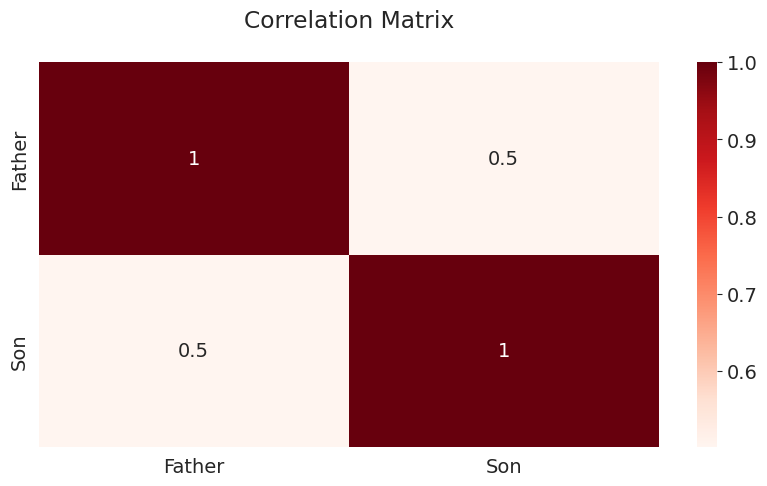

In [7]:
# Correlation Matrix
plt.figure(figsize=(10,5)) 
sns.heatmap(pearson_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix\n');

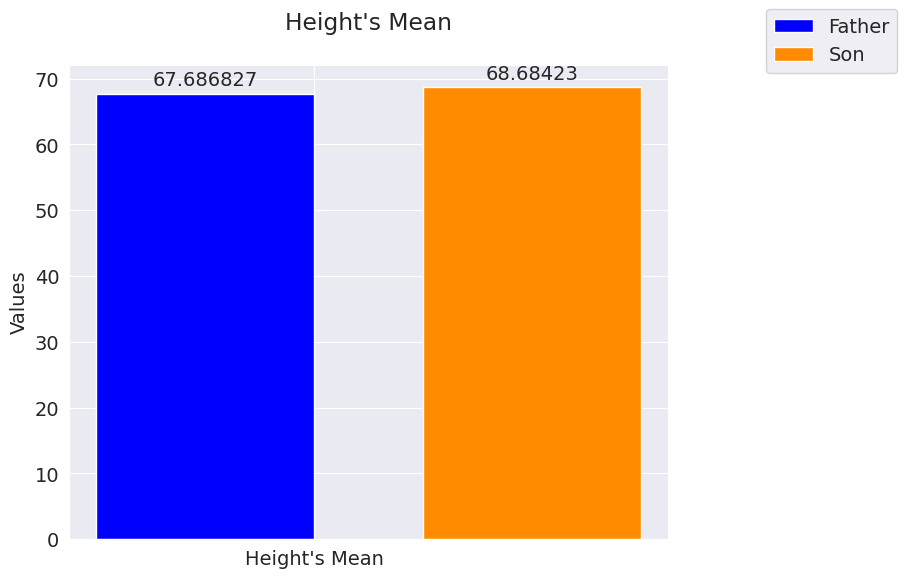

In [8]:
# Height's Mean Bar Chart
labels = ["Height's Mean"]
fr = [67.686827]
sn =[68.684230	]

x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars  

fig, ax = plt.subplots()
rects1 = ax.bar( x - width/2, fr, width, label='Father', color='blue')
rects2 = ax.bar( x + 2*width/2, sn, width, label='Son', color='darkorange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title("Height's Mean\n")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center right', bbox_to_anchor=(1.4, 1.05))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

The average height of the sons is `slightly greater` than the average height of the fathers.

In [9]:
# Father's height Distribution
fig = px.histogram(pearson_df, 
                   x='Father', 
                   marginal='box', 
                   nbins=47, 
                   color_discrete_sequence=['blue'], 
                   title= "Father's height Distribution")
fig.update_layout(bargap=0.1)
fig.show()

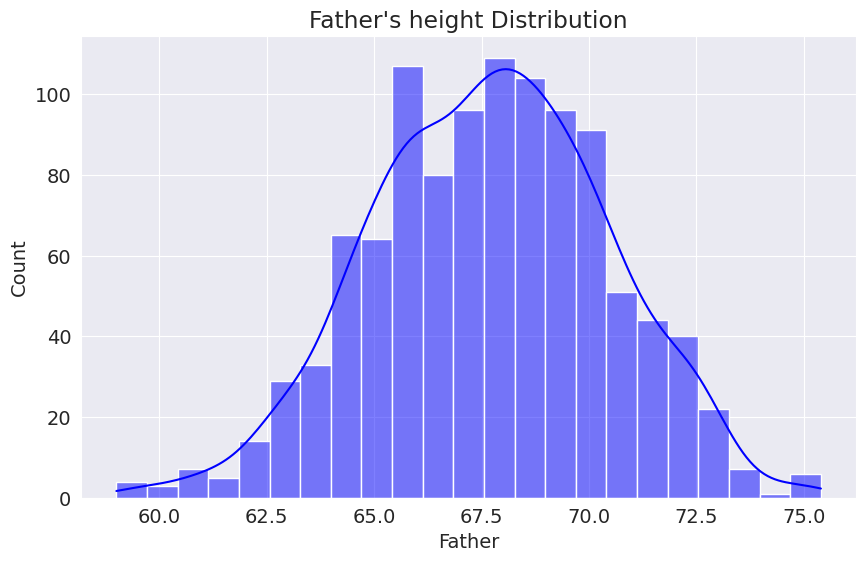

In [10]:
# Father's height Distribution
plt.title("Father's height Distribution") 
sns.histplot(pearson_df.Father, kde=True, color='blue'); 

In [11]:
# Son's height Distribution
fig = px.histogram(pearson_df, 
                   x='Son', 
                   marginal='box', 
                   nbins=47, 
                   color_discrete_sequence=['darkorange'], 
                   title= "Son's height Distribution")
fig.update_layout(bargap=0.1)
fig.show()

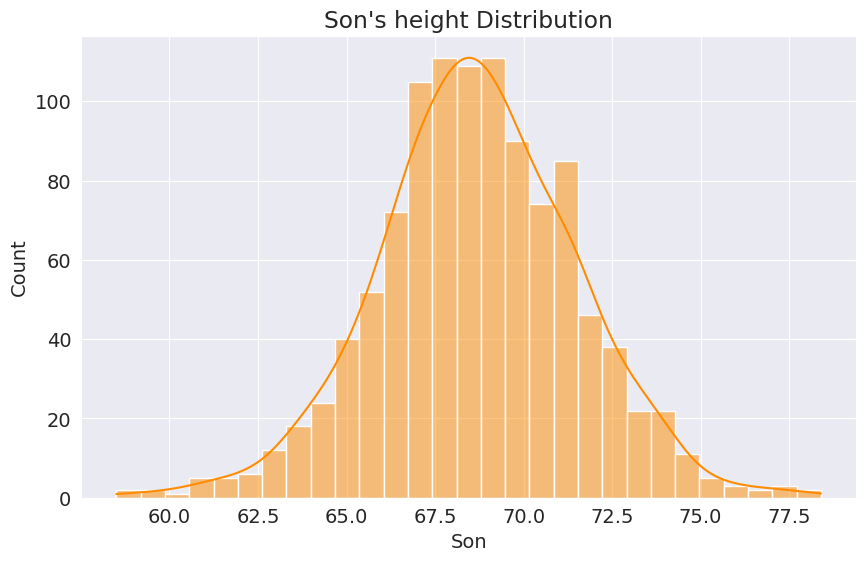

In [12]:
# Son's height Distribution
plt.title("Son's height Distribution")
sns.histplot(pearson_df.Son, kde=True, color='darkorange'); 

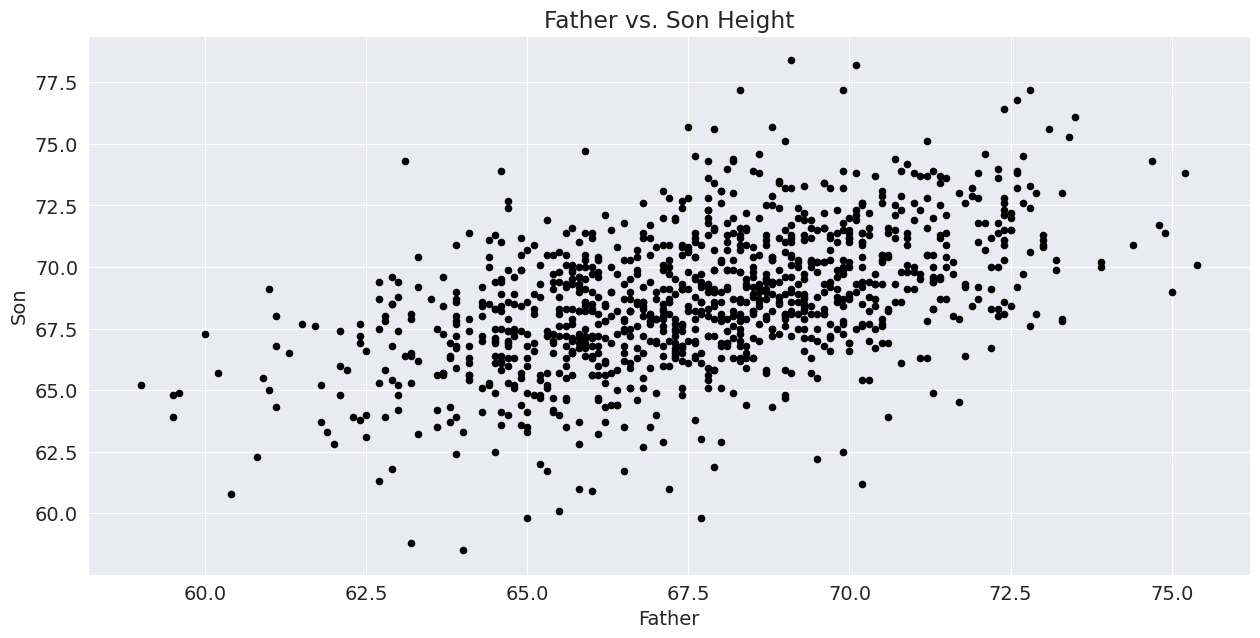

In [13]:
# Father vs. Son Height Scatter plot
pearson_df.plot(kind="scatter",
           x="Father",
           y="Son",
           figsize=(15,7),
           color="black");
plt.title('Father vs. Son Height')
plt.show()

It seems `Positive but weak correlation`

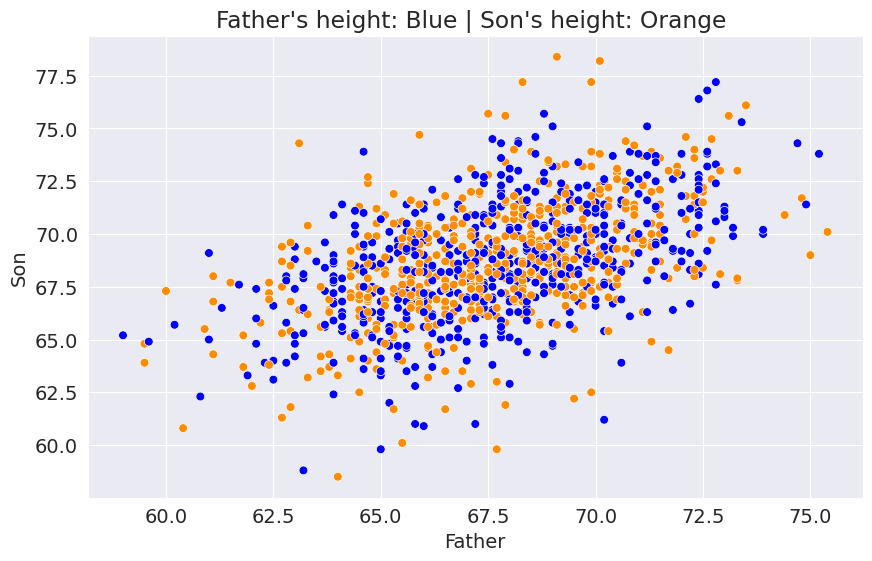

In [14]:
# Scatter plot
sns.scatterplot(data=pearson_df, x="Father", y="Son", hue="Father",s=40,
               palette=['blue','darkorange'], legend='')
plt.title("Father's height: Blue | Son's height: Orange ");

In [15]:
fig = px.scatter(pearson_df, 
                 x='Father', 
                 y='Son', 
                 color='Father', 
                 opacity=0.8, 
                 hover_data=['Son'], 
                 title='Father vs. Son Height')
fig.update_traces(marker_size=6)
fig.show()

# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #2E5B88; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;">  📈 Step 3 - Linear Regression Model Prepare</p>


Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

## <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color:red; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 1️⃣ First method: using Mathematical Functions</p>

### 1. Model

A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

In the above case, the x axis shows `Father'height` and the y axis shows `Son's height`. Thus, we're assume the following relationship between the two:

`Son's height` = `w` $\times$ `Father'height` $+$ `b`

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called `_linear regression_`, and we call the above equation a `_linear regression model_`, because it models the relationship between "Father'height" and "Son's height" as a straight line. 

* The numbers $w$ and $b$ are called the `_parameters_` or `_weights_` of the model.

* The values in the "Father'height" column of the dataset are called the `inputs` to the model and the values in the "Son's height" column are called `targets`. 

In [16]:
# Let define a helper function `estimate_charges`, to compute `Son's height`, given `Father'height`, w and b.
def estimate_charges(father, w, b):
    return w * father + b

In [17]:
# The `estimate_charges` function is our very first _model_.
#Let's _guess_ the values for w and b and use them to estimate the value for `Son's height`
w = 1.5
b = 30

In [18]:
# Fit the `estimate_charges` function with the values for w and b
fathers = pearson_df.Father
estimated_charges = estimate_charges(fathers, w, b)

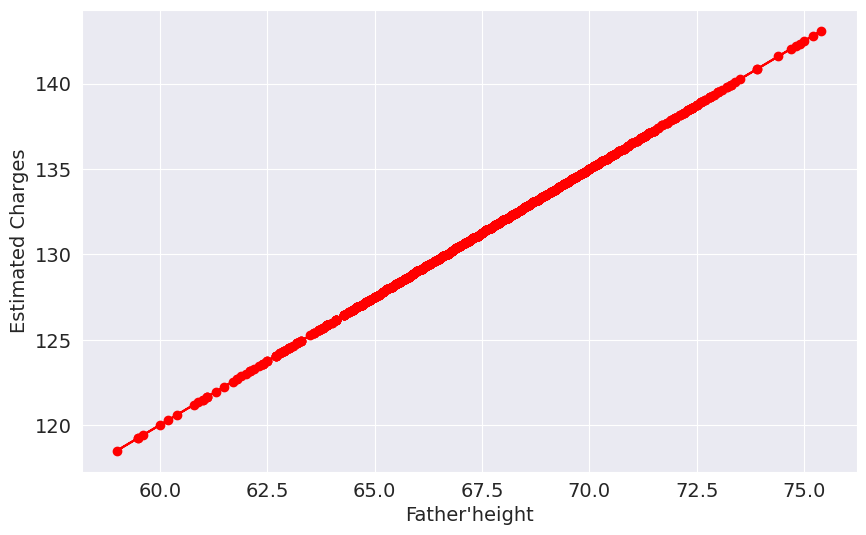

In [19]:
# We can plot the estimated charges using a line graph.
plt.plot(fathers, estimated_charges, 'r-o');
plt.xlabel("Father'height");
plt.ylabel('Estimated Charges');

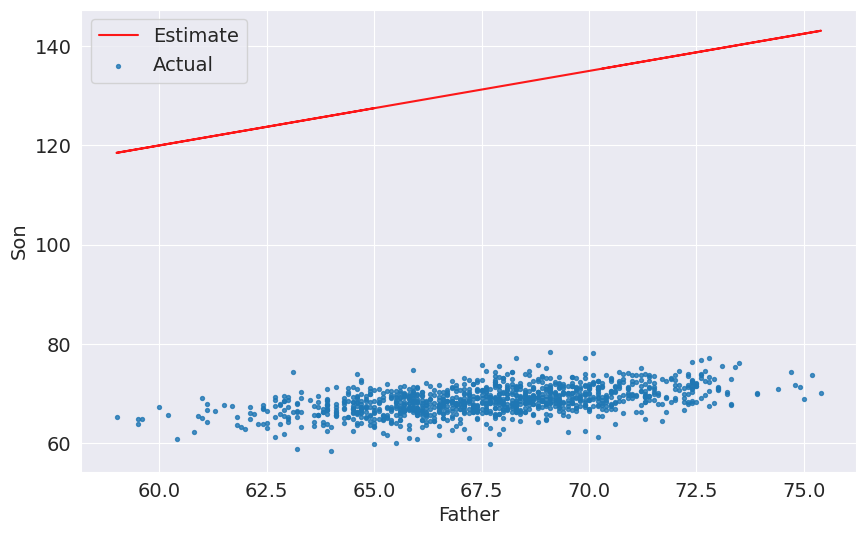

In [20]:
# We can overlay this line on the actual data, so see how well our model fits the data.¶
target = pearson_df.Son

plt.plot(fathers, estimated_charges, 'r', alpha=0.9);
plt.scatter(fathers, target, s=8,alpha=0.8);
plt.xlabel('Father');
plt.ylabel('Son')
plt.legend(['Estimate', 'Actual']);

In [21]:
# Clearly, the our estimates are quite poor and the line does not "fit" the data. 
# However, we can try different values of w and b to move the line around. 
# Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

def try_parameters(w, b):
    fathers = pearson_df.Father
    target = pearson_df.Son
    
    estimated_charges = estimate_charges(fathers, w, b)
    
    plt.plot(fathers, estimated_charges, 'r', alpha=0.9);
    plt.scatter(fathers, target, s=8,alpha=0.8);
    plt.xlabel('Father');
    plt.ylabel('Son')
    plt.legend(['Estimate', 'Actual']);

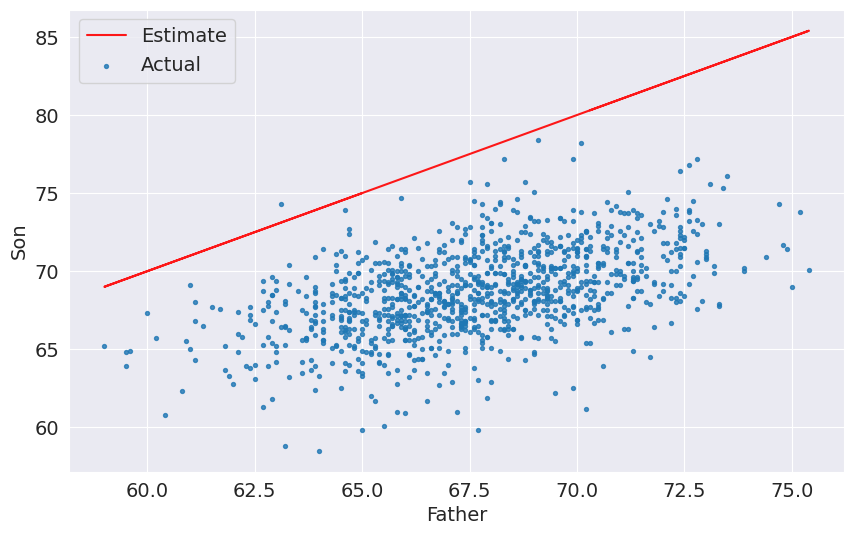

In [22]:
try_parameters(1, 10)

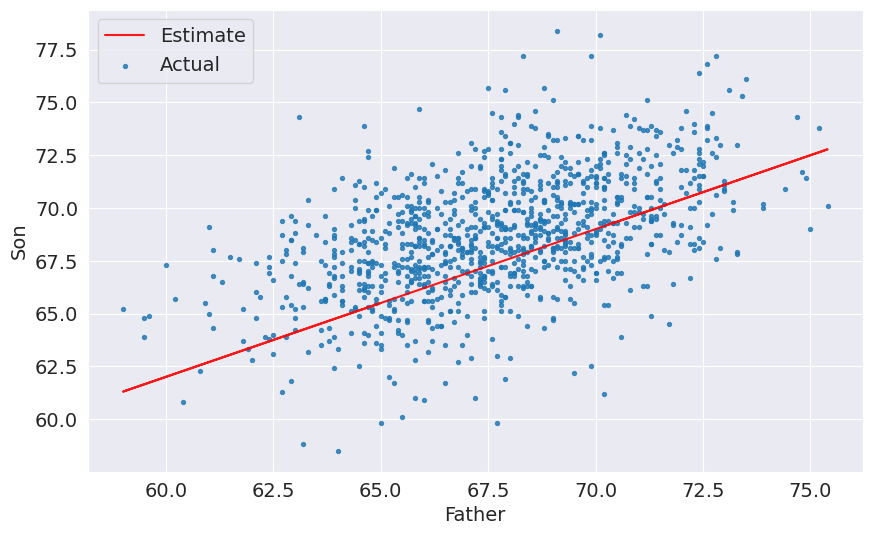

In [23]:
# Keep trying
try_parameters(0.7, 20)

### 2. Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [24]:
# Function of root mean squared error (RMSE)
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [25]:
# Define targets, predictions
targets = pearson_df['Son']
predicted = estimate_charges(pearson_df.Father, w, b)

In [26]:
# root mean squared error (RMSE) value
rmse(targets, predicted)

62.951391045062294

RMSE value is too large, it should be `reduced to or close to 0`

### 3. Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: better for smaller datasets
* Stochastic gradient descent: better for larger datasets

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)


In [27]:
# Let's modify the try_parameters functions to also display the loss.
def try_parameters(w, b):
    fathers = pearson_df.Father
    target = pearson_df.Son
    predictions = estimate_charges(fathers, w, b)
        
    plt.plot(fathers, predictions, 'r', alpha=0.9);
    plt.scatter(fathers, target, s=8, alpha=0.8);
    plt.xlabel('Father');
    plt.ylabel('Son')
    plt.legend(['predictions', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  5.631670516062196


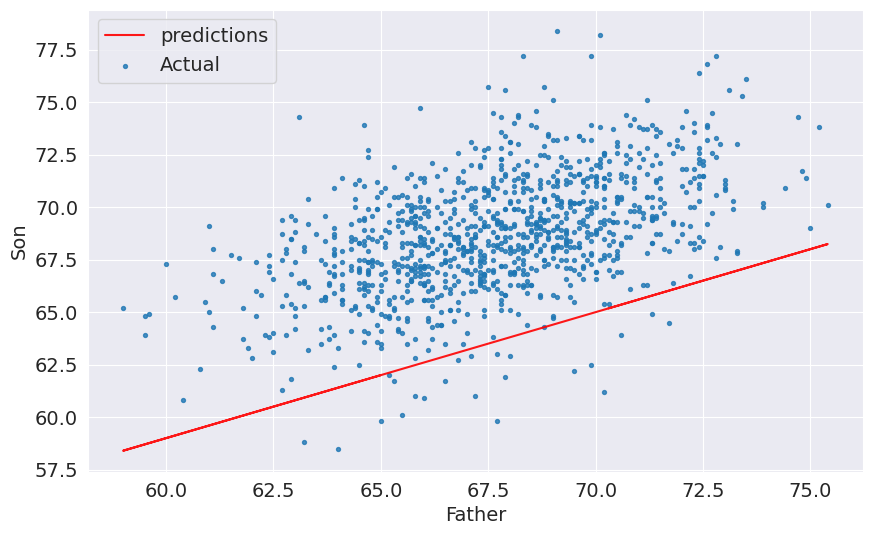

In [28]:
# Try different values of of w and b to minimize the RMSE loss.
try_parameters(0.6, 23)

RMSE Loss:  2.4501550865306365


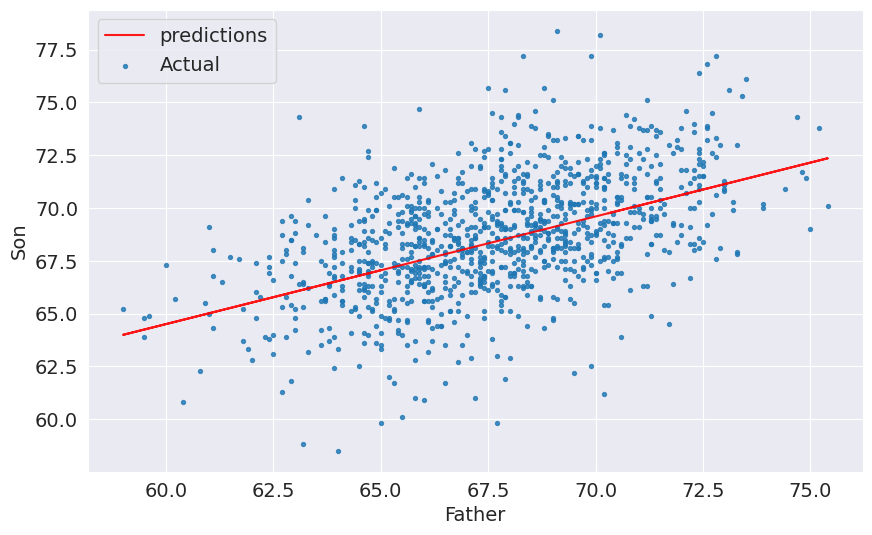

In [29]:
# Try different values of of w and b to minimize the RMSE loss.
try_parameters(0.51, 33.9)

## <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color:red; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 2️⃣ Second method: using Sklearn Liberary</p>

In [30]:
# In practice, you'll never need to implement either of the above methods yourself. You can use a library like sklearn to do this for you.
import sklearn

In [31]:
# Let's use the LinearRegression class from scikit-learn to find the best fit line for "Father" vs. "Son's height" 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [32]:
# We create a new model object.
model = LinearRegression()

In [33]:
# Next, we can use the fit method of the model to find the best fit line for the inputs and targets
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [34]:
# Define inputs, targets
inputs = pearson_df[['Father']]
targets = pearson_df.Son
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1078, 1)
targes.shape : (1078,)


In [35]:
# Fit the model with inputs, targets
model.fit(inputs, targets)

LinearRegression()

In [36]:
# Make some predictions
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

array([45.71493653, 52.9110193 , 65.24716121])

In [37]:
# Fit the model with predictions
predictions = model.predict(inputs)

In [38]:
# Display predictions
predictions

array([67.30318486, 66.4293748 , 67.30318486, ..., 70.79842506,
       70.23301856, 70.02741619])

In [39]:
# Best root mean squared error (RMSE) value
rmse(targets, predictions)

2.435871609139341

In [40]:
# w 
model.coef_

array([0.51400591])

In [41]:
# b
model.intercept_

33.892800540661675

RMSE Loss:  2.435871609139341


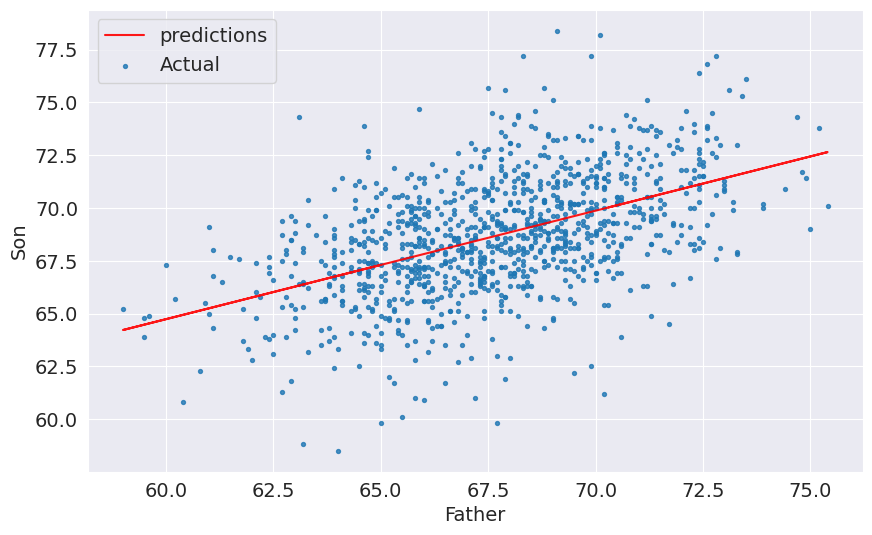

In [42]:
# The model try parameters to minimize the RMSE loss to the smallest value, and give us the final result.
try_parameters(model.coef_, model.intercept_)

# <p style="width: 800px; border-radius: 12px; border: 3px dashed white; padding: 20px; background-color: #2E5B88; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: white; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 🧩 Step 4 - Evaluate the Model</p>

* After try parameters on function $y = wx + b$ using First method (it takes a time) or using Second method (the faster)  the `Son's height` can be expressed by the following:

----------

 $y = 0.51x + 33.89$

----------

$y$ =  `Predicted Son's height`

$x$ = `Predicted Father's height`

----------


### Summary and References

We have covered the following topics in this notebook:

- Solving a typical old problem statement for simple linear regression analysis.
- Exploring the dataset for regression analysis.
- Creating some charts to illustrate more statistical details.
- Solving Single variable linear regression using Mathematical Functions.
- Solving Single variable linear regression using Sklearn Liberary.
- Evaluating the model.

References:

- https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

#### <p style="width: 800px; border-radius: 12px; border: 3px dashed grey; padding: 20px; background-color: white; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: #2E5B88; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> ✅ Now you can solve Simple linear regression problems in TWO methods using Python 🚀 Congratulations! 🎉</p>

#### <p style="width: 800px; border-radius: 12px; border: 3px dashed grey; padding: 20px; background-color: yellow; text-align: center; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.3); color: black; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3); font-weight: bold; margin-bottom: 15px; font-size: 30px;"> 🙂 If you find the information in this notebook useful 🙏 please Share it 🌍 and UPVOTE 🔼 </p>